### K Nearest Neighbour Classifier

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [47]:
from sklearn.datasets import make_classification

X,y = make_classification(
    n_samples=1000,
    n_features=3,
    n_redundant=1,
    n_classes=2,
    random_state=999
)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
classifier = KNeighborsClassifier(n_neighbors=5, algorithm='auto')
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
y_pred = classifier.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [54]:
accuracy_score(y_pred,y_test)

0.906060606060606

In [55]:
confusion_matrix(y_pred,y_test)

array([[158,  20],
       [ 11, 141]], dtype=int64)

In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       178
           1       0.88      0.93      0.90       152

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [39]:
no_neighbors = np.arange(1,9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

In [40]:
for i,k in enumerate(no_neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)

    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)

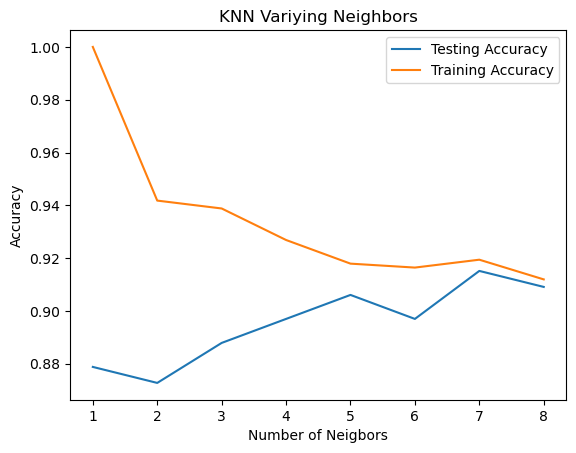

In [41]:
plt.title("KNN Variying Neighbors")
plt.plot(no_neighbors,test_accuracy,label="Testing Accuracy")
plt.plot(no_neighbors,train_accuracy,label="Training Accuracy")
plt.legend()
plt.xlabel("Number of Neigbors")
plt.ylabel("Accuracy")
plt.show()

In [42]:
train_accuracy

array([1.        , 0.94179104, 0.93880597, 0.92686567, 0.91791045,
       0.91641791, 0.91940299, 0.9119403 ])

In [43]:
test_accuracy

array([0.87878788, 0.87272727, 0.88787879, 0.8969697 , 0.90606061,
       0.8969697 , 0.91515152, 0.90909091])

In [62]:
def plot_3d_decision_boundary(X, y, model, title):
    h = 0.2  # step size in the mesh

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy, zz = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h),
        np.arange(z_min, z_max, h)
    )

    # Predict for each point in the mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot decision boundary as a scatter plot
    ax.scatter(xx.ravel(), yy.ravel(), zz.ravel(), c=Z.ravel(), alpha=0.1, cmap='coolwarm', s=1)

    # Plot the training points
    for i, color in enumerate(['red', 'blue']):
        idx = np.where(y == i)
        ax.scatter(X[idx, 0], X[idx, 1], X[idx, 2], c=color, label=f"Class {i} (Feature 1)", edgecolor='k', s=20)

    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Feature 3")
    ax.legend()
    plt.show()

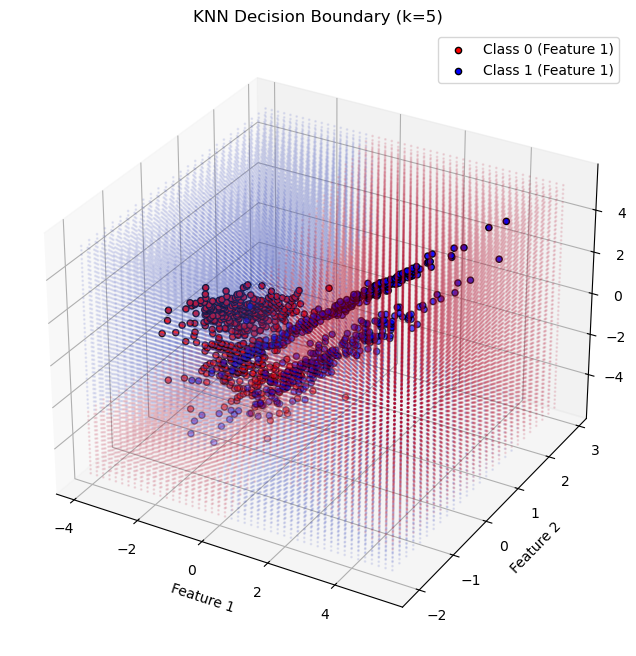

In [61]:
plot_3d_decision_boundary(X,y,classifier,title=f"KNN Decision Boundary (k=5)")

##### Plotting the boundary with 2 features and different level of cluster

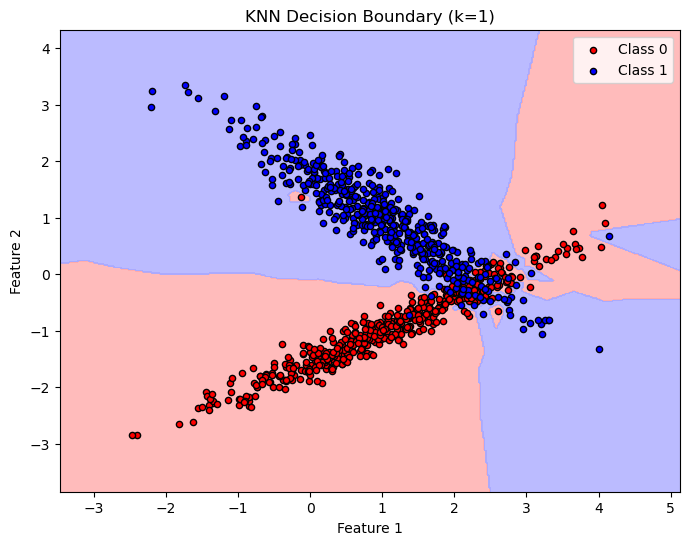

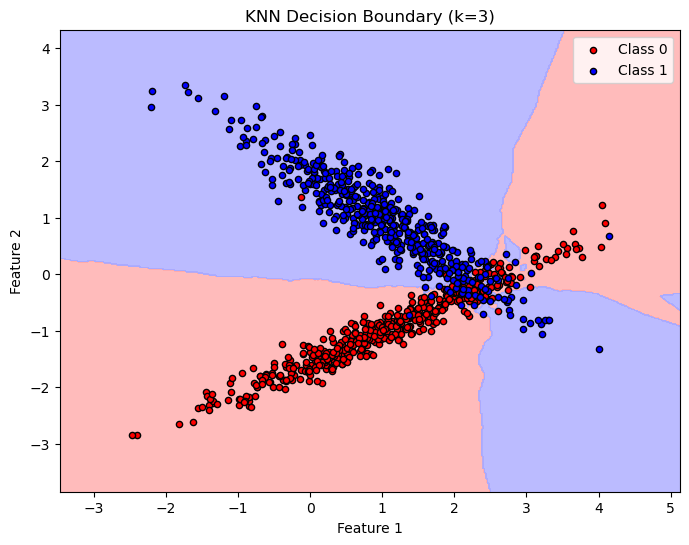

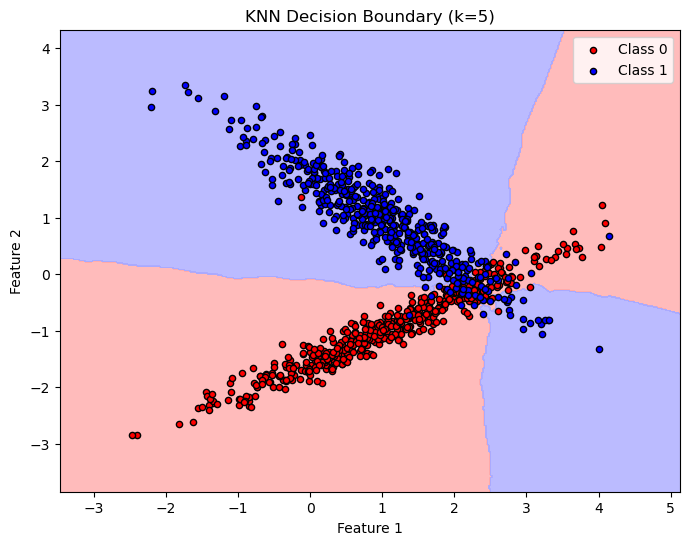

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier


# Generate synthetic dataset
X, y = make_classification(n_samples=1000,
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=2, random_state=42
)

# Plotting the decision boundary
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ['red', 'blue']

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Plot the training points
    for i, color in enumerate(cmap_bold):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=f"Class {i}", edgecolor='k', s=20)

    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Fit and visualize KNN with different numbers of neighbors
for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    plot_decision_boundary(X, y, knn, title=f"KNN Decision Boundary (k={k})")


#### Using 3 different features to visualize

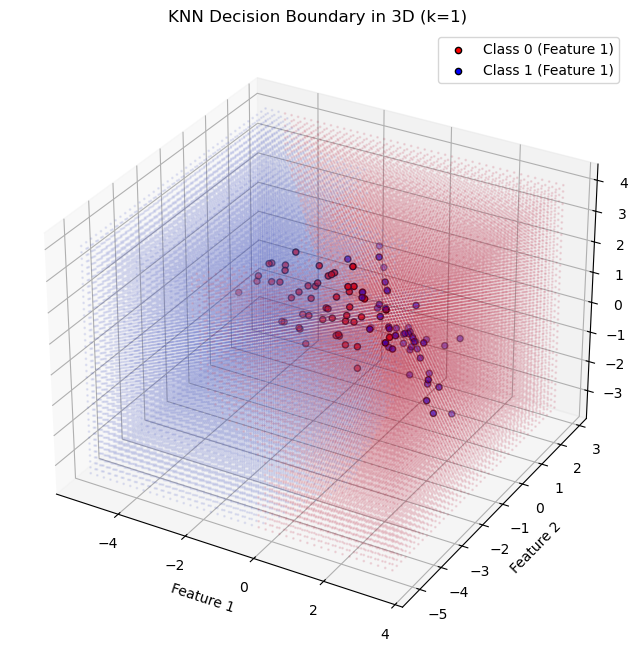

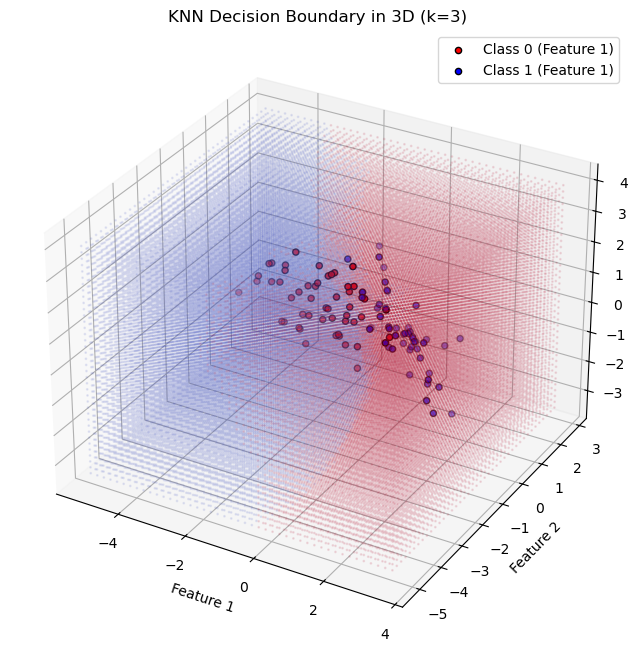

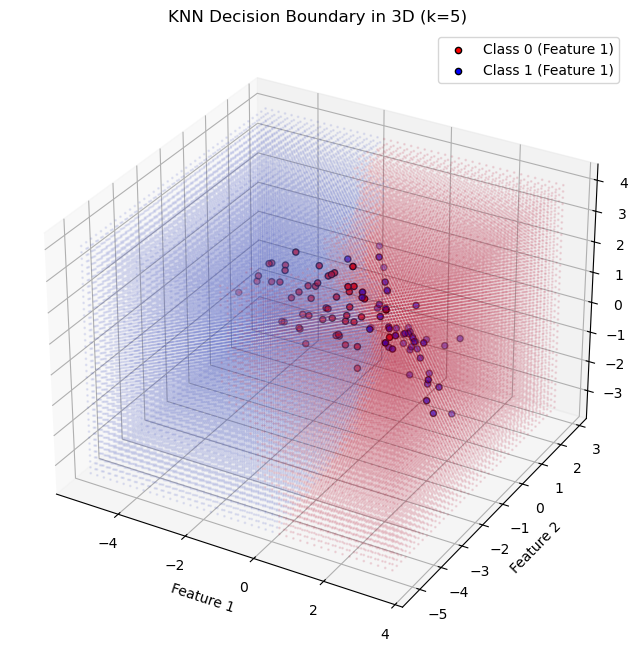

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic dataset
X, y = make_classification(
    n_features=3, n_redundant=0, n_informative=3, n_clusters_per_class=1, n_classes=2, random_state=42
)

# Plotting the decision boundary in 3D
def plot_3d_decision_boundary(X, y, model, title):
    h = 0.2  # step size in the mesh

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy, zz = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h),
        np.arange(z_min, z_max, h)
    )

    # Predict for each point in the mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points in 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot decision boundary as a scatter plot
    ax.scatter(xx.ravel(), yy.ravel(), zz.ravel(), c=Z.ravel(), alpha=0.1, cmap='coolwarm', s=1)

    # Plot the training points with different colors for each feature
    for i, color in enumerate(['red', 'blue']):
        idx = np.where(y == i)
        ax.scatter(X[idx, 0], X[idx, 1], X[idx, 2], c=color, label=f"Class {i} (Feature 1)", edgecolor='k', s=20)

    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_zlabel("Feature 3")
    ax.legend()
    plt.show()

# Fit and visualize KNN with different numbers of neighbors
for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    plot_3d_decision_boundary(X, y, knn, title=f"KNN Decision Boundary in 3D (k={k})")
